![Grubhub](https://raw.githubusercontent.com/interviewquery/takehomes/grubhub_1/grubhub_1/logo.png)

Given the attached data (`generated_orders1.csv`), which state should we focus our only available
product development team on? 

Respond with your answer and reasoning. Where
you don't have enough data to make a decision, make assumptions and list
them in your response.

Definitions of data in file:
- `total_orders`: online food orders placed on grubhub.com
- `visits`:  the number of unique times people have gone to grubhub.com
- `revenue`: the amount of money we are making

In [ ]:
!git clone --branch grubhub_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/grubhub_1
!ls

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('generated_orders1.csv')
df.shape


(724, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          724 non-null    object 
 1   state         724 non-null    object 
 2   total_orders  724 non-null    int64  
 3   revenue       724 non-null    float64
 4   visits        724 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 28.4+ KB


In [34]:
summary = df.groupby('state').agg({'total_orders':'sum','revenue':'sum','visits':'sum'}).reset_index()
summary['revenue_per_order'] = summary['revenue']/summary['total_orders']
summary['revenue_per_visit'] = summary['revenue']/summary['visits']
summary['conversion_rate'] = summary['total_orders']/summary['visits']
summary


,state,total_orders,revenue,visits,revenue_per_order,revenue_per_visit,conversion_rate
0,CA,102826,2.594300e+06,3603418,25.230000,0.719955,0.028536
1,IA,4612120,1.388744e+09,489594378,301.107469,2.836519,0.009420
2,IL,2008312,4.440378e+07,21446435,22.110000,2.070450,0.093643
3,NYC,2956557,3.753201e+08,55537849,126.945001,6.757916,0.053235


Text(0.5, 1.0, 'Revenue per visit')

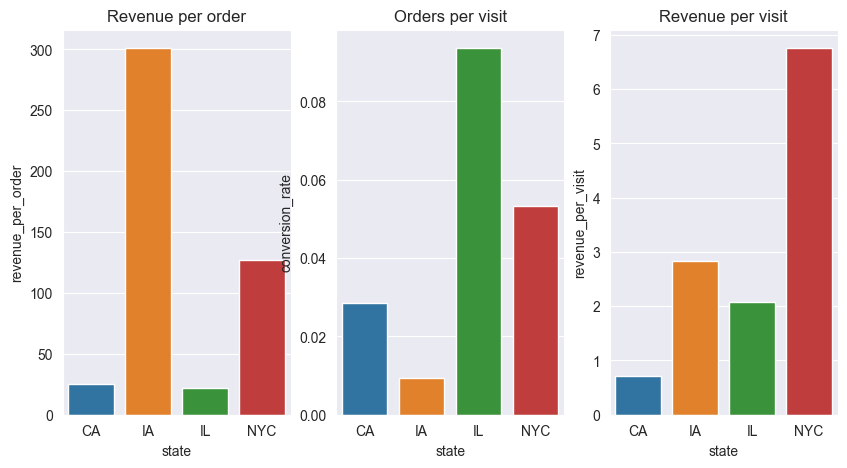

In [29]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,5))
sns.barplot(x='state',y='revenue_per_order',data=summary,hue='state',ax=ax1)
sns.barplot(x='state',y='conversion_rate',data=summary,hue='state',ax=ax2)
sns.barplot(x='state',y='revenue_per_visit',data=summary,hue='state',ax=ax3)

ax1.title.set_text('Revenue per order')
ax2.title.set_text('Orders per visit')
ax3.set_title('Revenue per visit')

In [5]:
df['revenue_per_order'] = df['revenue']/df['total_orders']
df['revenue_per_visit'] = df['revenue']/df['visits']
df['conversion_rate'] = df['total_orders']/df['visits']
df

,date,state,total_orders,revenue,visits,revenue_per_order,revenue_per_visit,conversion_rate
0,1/1/2014,CA,411,10369.53,17633,25.23,0.588075,0.023309
1,1/2/2014,CA,347,8754.81,15949,25.23,0.548925,0.021757
2,1/3/2014,CA,522,13170.06,11731,25.23,1.122672,0.044497
3,1/4/2014,CA,635,16021.05,16728,25.23,0.957739,0.037960
4,1/5/2014,CA,214,5399.22,12570,25.23,0.429532,0.017025
...,...,...,...,...,...,...,...,...
719,6/26/2014,IA,38470,14757861.40,5381151,383.62,2.742510,0.007149
720,6/27/2014,IA,20587,7918171.94,4384696,384.62,1.805866,0.004695
721,6/28/2014,IA,38361,14792768.82,6258023,385.62,2.363809,0.006130
722,6/29/2014,IA,24627,9521290.74,2874329,386.62,3.312526,0.008568


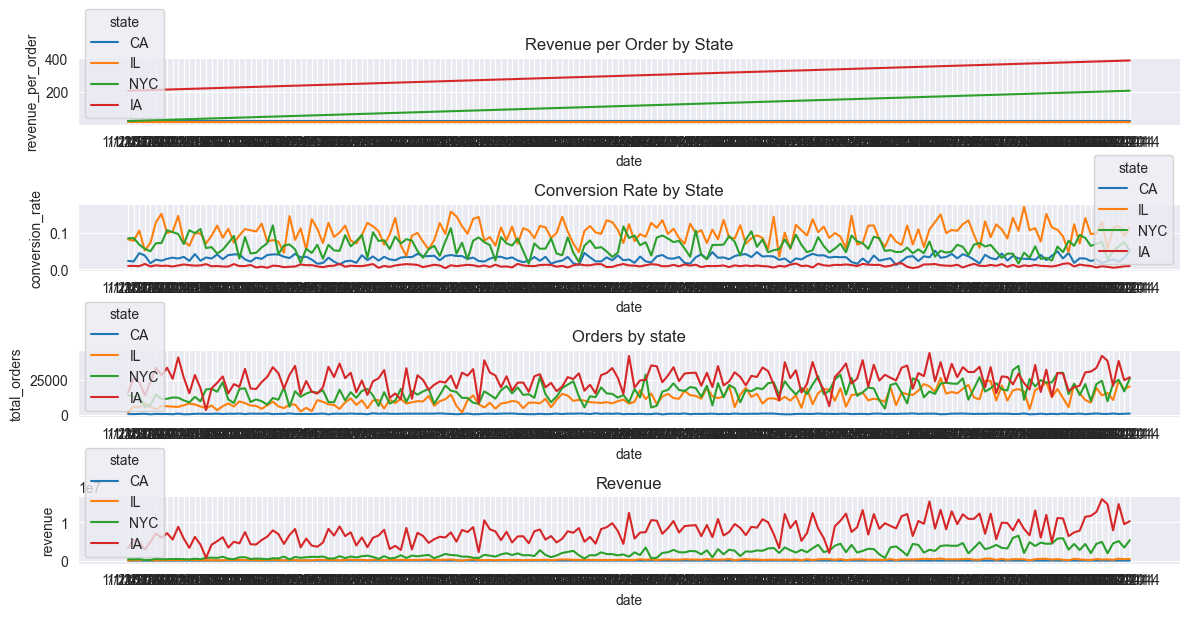

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the subplots
fig, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, figsize=(12, 6))

# Plot using Seaborn
sns.lineplot(x='date', y='revenue_per_order', data=df, hue='state', ax=ax1)
sns.lineplot(x='date', y='conversion_rate', data=df, hue='state', ax=ax2)
sns.lineplot(x='date', y='total_orders', data=df, hue='state', ax=ax3)
sns.lineplot(x='date', y='revenue',data=df, hue='state', ax=ax4)

# Set titles for clarity
ax1.set_title("Revenue per Order by State")
ax2.set_title("Conversion Rate by State")
ax3.set_title("Orders by state")
ax4.set_title("Revenue")

# Show the plot
plt.tight_layout()
plt.show()


In [37]:
# Define the ROI calculation function
def calculate_roi(df, state, factor=10000, divisor=1000, multiplier=100):
    return ((df[df['state'] == state]['revenue_per_visit'] * factor) / divisor) * multiplier

# Calculate ROI for NYC and IL
nyc_roi = calculate_roi(summary, 'NYC')
il_roi = calculate_roi(summary, 'IL')

# Print results (optional)

print(f"NYC ROI: {nyc_roi}")
print(f"IL ROI: {il_roi}")


NYC ROI: 3    6757.916216
Name: revenue_per_visit, dtype: float64
IL ROI: 2    2070.450325
Name: revenue_per_visit, dtype: float64
